# 7. Garantizando acceso a internet en zonas rurales

## 7.1 Contexto

Colombia cuenta con diversas poblaciones rurales, particularmente en zonas montañosas o selváticas, donde el acceso a internet es escaso o inexistente. Suponga que el gobierno colombiano planea lanzar un satélite de vigilancia y telecomunicaciones para mejorar la conectividad en una comunidad rural aislada, como la región del Chocó o el Amazonas. Para maximizar la eficiencia del satélite, se debe determinar su órbita óptima para cubrir la mayor área posible sobre la superficie terrestre.

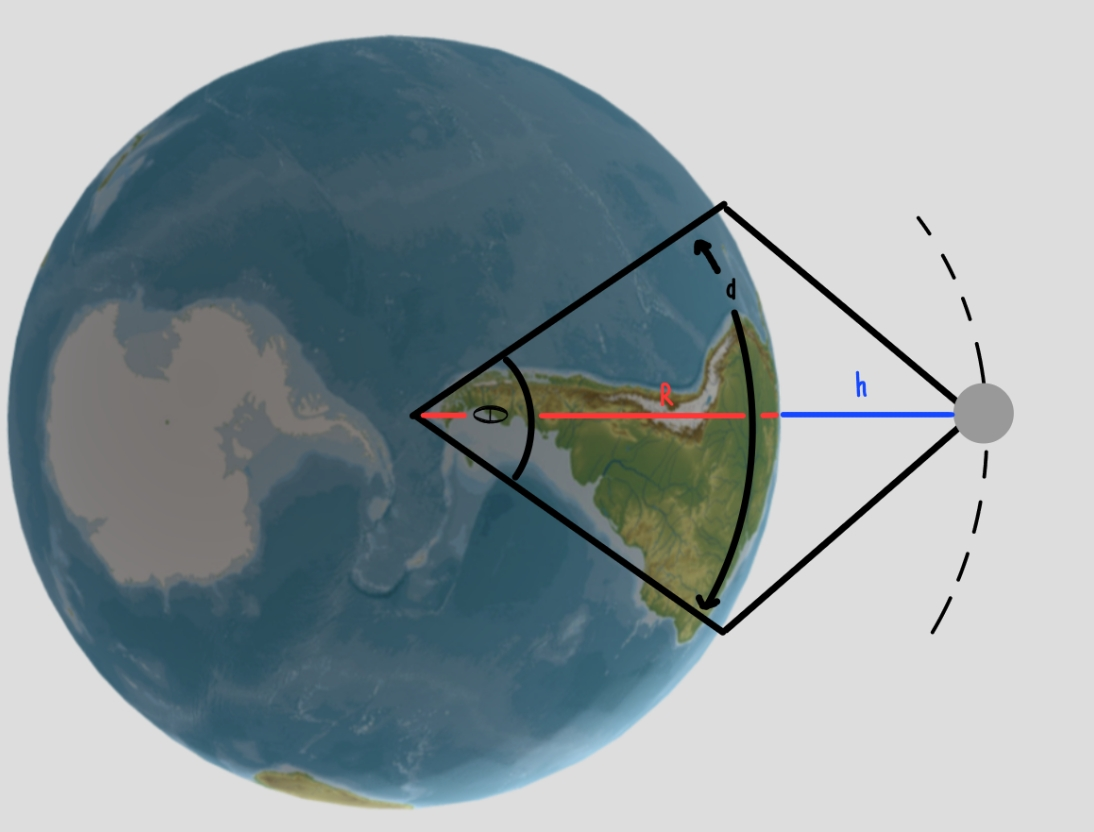

## 7.2 Tema

Aplicaciones de trigonometría

## 7.3  Objetivo

Determinar la órbita óptima de un satélite de comunicaciones que cubra la mayor parte de una región determinada de la Tierra.

## 7.4 Actividad

### 7.4.1  Determinación de altura orbital de un satélite

Un satélite de comunicaciones da vueltas alrededor de la Tierra a una altura de $h$ $km$ sobre la superficie de colombiana.  Suponga que $d$ es la distancia cubierta en $kms$, sobre la superficie de la Tierra que se puede observar desde el satélite.
¿Cuál es la altura orbital óptima para un satélite colombiano, de modo que maximice la distancia observable sobre la superficie terrestre y así garantizar una cobertura eficiente para una comunidad rural aislada?

Para resolver esta pregunta general, teniendo en cuenta que el Radio medio terrestre $R = 6378\;\text{km}$.   considere las siguientes preguntas intermedias:

(a) Encuentre la ecuación que relaciona el ángulo central $\theta$ y la altura $h$.

(b) Encuentre la ecuación que relaciona la distancia observable $d$ y el ángulo central $\theta$.

(c) Encuentre la ecuación que relaciona directamente la distancia observable $d$ y la altura $h$.

(d) Si la distancia observable requerida para cubrir adecuadamente la región rural aislada $d$  es de 2500 km, ¿cuál debe ser la altura orbital del satélite?

(e) Si el satélite gira a una altura de 300 km, ¿cuál será la distancia observable sobre la superficie?

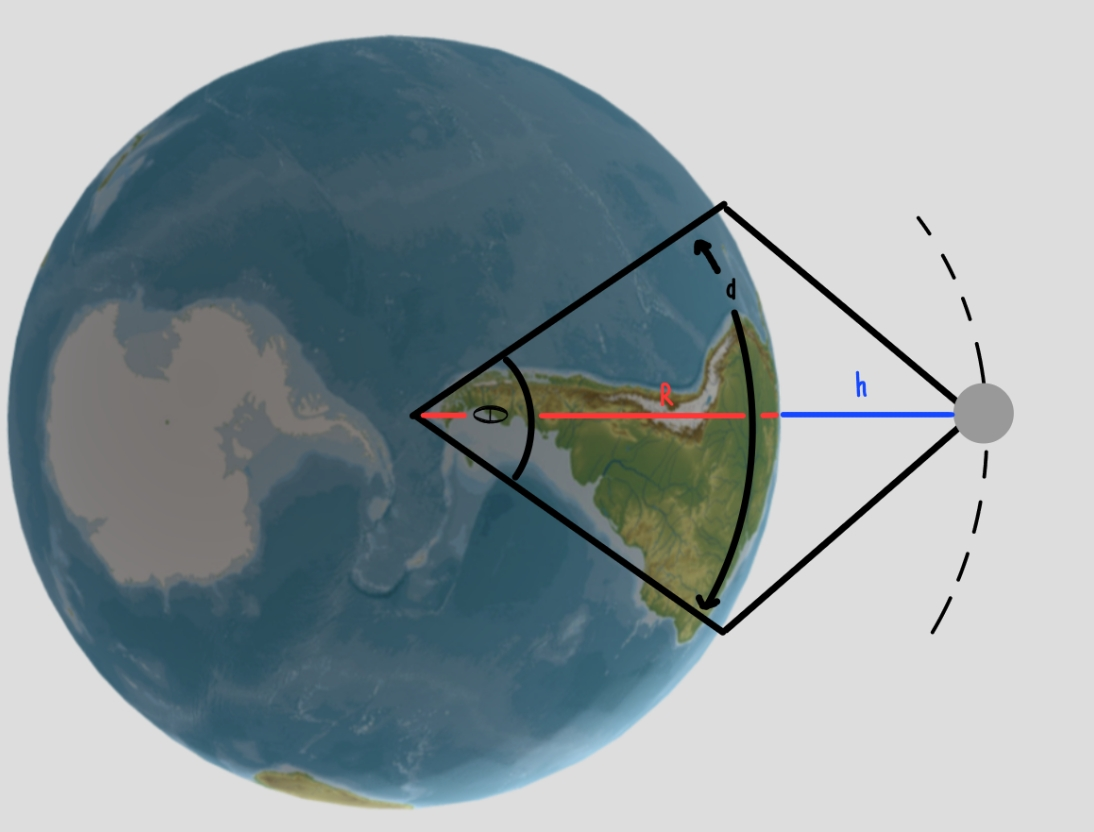

### 7.4.2 Jugando con el computador!

#### **Pregunta global:**  
> Teniendo en cuenta que $d$ es la distancia entre Quibdó y Mitú ¿Cuál es la *menor* altura orbital $h_{\min}$ que debe tener un satélite colombiano para **observar simultáneamente** las ciudades de Quibdó, Mitú y además, cubrir un *margen adicional* $m$ (en km) alrededor de la línea que las une, garantizando así conectividad a las veredas cercanas?

Responder esta pregunta exige determinar la pareja $(h_{\min},m)$ que satisface la condición geométrica de cobertura mientras mantiene la órbita lo más baja (y, por tanto, económica) posible.


1. **Comprender el problema.** En esta etapa se busca comprender bien el problema que se quiere resolver e identificar las variables, datos y reglas relevantes para solucionar el problema.

2. **Planear la solución.** ¿Qué pasos debes seguir para resolver el problema?  
        Describe tu estrategia para resolver el problema 

3. **Ejecutar el plan.** En esta etapa deberías ejecutar la estrategia identificada en el paso anterior usando herramientas matemáticas, posiblemente asistidas por software.
Si necesitas puedes usar python como calculadora para realizar los cálculos necesarios.

4. **Examinar la solución obtenida** Siempre que encuentres una solución de un problema es importante asegurarte que los resultados obtenido sean acordes  a las condiciones  iniciales del problema, factibles y en el caso contrario deberías regresar el primer paso. ¿Por qué crees que tu solución esta correcta?

## Sub-preguntas necesarias para resolver la Pregunta – Problema

| Nº | Sub-pregunta | Rol dentro de la metodología de Polya |
|----|--------------|---------------------------------------|
| **1** | **¿Cuál es la distancia superficial $D$ entre Quibdó y Mitú?** (Usar la **ley de los cosenos** con el ángulo central $\theta_0 = 7.6^\circ$. | Fase 1-2: *Comprender* y *planear* (se identifican datos y se elabora el plan analítico). |
| **2** | **¿Qué expresión relaciona la distancia de cobertura $d(h)$ con la altura orbital $h$?** | Fase 2: *Planear* (modelar con geometría del círculo, $d(h)=\sqrt{(R+h)^2-R^2}$. |
| **3** | **¿Qué desigualdad debe cumplirse para garantizar la cobertura con margen $m$?**<br>$\displaystyle d(h)\;\ge\;\dfrac{D}{2}+m$ | Fase 2-3: *Planear* y *ejecutar* (traducción de la situación a una condición matemática). |
| **4** | **Dados $m$ y $D$, cuál es el **valor mínimo** de $h$ que satisface la desigualdad?** | Fase 3: *Ejecutar* (se encuentra $h_{\min}$ numéricamente usando el valor obtenido de los *sliders*). |
| **5** | **¿La solución obtenida es realmente óptima y cumple el objetivo social de conectividad?** | Fase 4: *Evaluar* (reflexión sobre viabilidad técnica y beneficio para las comunidades). |

Recordar que :

- Radio medio terrestre $R = 6378\;\text{km}$.  
- Ángulo central Quibdó–Mitú $\theta_0 = 7.6^\circ$.

La siguiente celda te permitirá interactuar con los sliders para responder lo solicitado:

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, FloatText, VBox, HBox, interactive_output


# ──────────────────────────────────────────────────────────────────────────
#  Parámetros fijos
# ──────────────────────────────────────────────────────────────────────────
R  = 6378                      # radio medio de la Tierra (km)
θ0 = 7.6 * np.pi / 180         # ángulo central Quibdó–Mitú (rad)
D_predet = R * θ0              # distancia superficial predeterminada (km)

# ──────────────────────────────────────────────────────────────────────────
#  Widgets
# ──────────────────────────────────────────────────────────────────────────
D_text   = FloatText(value=np.round(D_predet, 2), description='D (km):')
h_slider = FloatSlider(value=500, min=100,  max=1200, step=10, description='h (km):')
m_slider = FloatSlider(value=0,   min=0,    max=300,  step=10, description='m (km):')

# ──────────────────────────────────────────────────────────────────────────
#  Función de apoyo para empujar radialmente un punto
# ──────────────────────────────────────────────────────────────────────────
def push_radially(pt, factor=1.22):
    """Devuelve un nuevo punto algo más lejos del origen (factor > 1)."""
    return pt * factor

# ──────────────────────────────────────────────────────────────────────────
#  Función de dibujo
# ──────────────────────────────────────────────────────────────────────────
def plot_satellite(D, h, m):
    plt.clf()
    fig = plt.gcf()
    ax  = fig.add_subplot(111)
    ax.set_aspect('equal')

    # Distancia de cobertura
    d = np.sqrt((R + h)**2 - R**2)

    # Tierra
    earth = plt.Circle((0, 0), R, color='lightblue', alpha=0.4)
    ax.add_patch(earth)

    # Ciudades Q y M
    half = θ0 / 2
    Q = np.array([R * np.cos( half), R * np.sin( half)])
    M = np.array([R * np.cos(-half), R * np.sin(-half)])

    ax.plot(*Q, 'ko')
    ax.plot(*M, 'ko')
    ax.text(*push_radially(Q, 1.22), 'Quibdó', weight='bold')
    ax.text(*push_radially(M, 1.22), 'Mitú',   weight='bold')

    # Satélite sobre el meridiano central
    sat = np.array([R + h, 0.0])
    ax.plot(*sat, 'ro', ms=6)
    ax.text(*push_radially(sat, 1.03), 'SAT', color='red', weight='bold',
            ha='left', va='center')

    # Valor de h en la esquina superior derecha
    ax.text(0.98, 0.95, f'h = {h:.0f} km', transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
            fontsize=10)

    # Círculo límite de visión
    θ_view = np.arccos(R / (R + h))
    φ = np.linspace(-θ_view, θ_view, 400)
    ax.plot(R * np.cos(φ), R * np.sin(φ), 'r--', lw=1)

    # Límites y estética
    margen = 2200                           # un poco más de aire
    ax.set_xlim(-R - margen, R + margen)
    ax.set_ylim(-R - margen, R + margen)
    ax.set_xlabel('km'); ax.set_ylabel('km')
    ax.set_title(f'Cobertura superficial   d = {d:.0f} km   '
                 f'(requerido ≥ {(D/2 + m):.0f} km)')
    ax.grid(True)
    plt.show()

# ──────────────────────────────────────────────────────────────────────────
#  UI + figura
# ──────────────────────────────────────────────────────────────────────────
ui  = VBox([HBox([D_text]), h_slider, m_slider])
out = interactive_output(plot_satellite,
                         {'D': D_text, 'h': h_slider, 'm': m_slider})

display(ui, out)


Output()